# Kapitel 1: Wahrscheinlichkeitsrechnung und Zufallsvariablen

**Statistik für Informatik – DHBW Stuttgart**  
**Interaktives Übungsnotebook**

---

**Lernziele:**
- Zufallsvorgänge formal beschreiben
- Ereignisse und deren Wahrscheinlichkeiten berechnen
- Bedingte Wahrscheinlichkeit und Satz von Bayes anwenden
- Diskrete und stetige Zufallsvariablen unterscheiden
- PMF, PDF und CDF interpretieren und anwenden


## 0. Setup: Import der Bibliotheken


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from fractions import Fraction
import warnings
warnings.filterwarnings('ignore')

# Plot-Konfiguration
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11

np.random.seed(42)

print("✅ Alle Bibliotheken geladen!")


✅ Alle Bibliotheken geladen!


---
## 1. Ergebnisraum und Ereignisse

### 1.1 Der Ergebnisraum $\Omega$

Der **Ergebnisraum** $\Omega$ ist die Menge aller möglichen Ausgänge eines Zufallsvorgangs.

| Typ | Beispiel | $\Omega$ |
|-----|----------|----------|
| Endlich, diskret | Würfelwurf | $\{1, 2, 3, 4, 5, 6\}$ |
| Endlich, diskret | Zwei Münzwürfe | $\{KK, KZ, ZK, ZZ\}$ |
| Unendlich, diskret | Würfeln bis zur ersten 6 | $\{1, 2, 3, \ldots\} = \mathbb{N}$ |
| Kontinuierlich | Wartezeit an der Bushaltestelle | $[0, \infty) \subset \mathbb{R}$ |


In [2]:
# Ergebnisräume in Python

# Würfelwurf
omega_wuerfel = {1, 2, 3, 4, 5, 6}
print(f"Ω (Würfel): {sorted(omega_wuerfel)}")
print(f"|Ω| = {len(omega_wuerfel)}")

# Zwei Münzwürfe
omega_muenz = {'KK', 'KZ', 'ZK', 'ZZ'}
print(f"\nΩ (2 Münzwürfe): {sorted(omega_muenz)}")
print(f"|Ω| = {len(omega_muenz)}")

# Ereignisse als Teilmengen
A = {2, 4, 6}     # Gerade Zahl
B = {1, 2, 3}     # Höchstens 3
C = {6}            # Genau eine 6

print(f"\nEreignisse beim Würfelwurf:")
print(f"A (gerade Zahl):   {sorted(A)}")
print(f"B (höchstens 3):   {sorted(B)}")
print(f"C (genau 6):       {sorted(C)}")


Ω (Würfel): [1, 2, 3, 4, 5, 6]
|Ω| = 6

Ω (2 Münzwürfe): ['KK', 'KZ', 'ZK', 'ZZ']
|Ω| = 4

Ereignisse beim Würfelwurf:
A (gerade Zahl):   [2, 4, 6]
B (höchstens 3):   [1, 2, 3]
C (genau 6):       [6]


### 1.2 Mengenoperationen für Ereignisse

| Operation | Notation | Bedeutung | Python |
|-----------|----------|-----------|--------|
| Vereinigung | $A \cup B$ | Mindestens eines tritt ein | `A \| B` |
| Schnitt | $A \cap B$ | Beide treten ein | `A & B` |
| Komplement | $\bar{A}$ | $A$ tritt nicht ein | `omega - A` |
| Differenz | $A \setminus B$ | $A$ aber nicht $B$ | `A - B` |


In [3]:
# Mengenoperationen beim Würfelwurf
omega = {1, 2, 3, 4, 5, 6}
A = {2, 4, 6}  # Gerade
B = {1, 2, 3}  # Höchstens 3

print("Mengenoperationen beim Würfelwurf")
print(f"A = {sorted(A)}  (gerade)")
print(f"B = {sorted(B)}  (höchstens 3)")
print()

# Vereinigung
print(f"A ∪ B = {sorted(A | B)}")
print("  → Gerade ODER höchstens 3\n")

# Schnitt
print(f"A ∩ B = {sorted(A & B)}")
print("  → Gerade UND höchstens 3 (nur die 2)\n")

# Komplement
print(f"Ā     = {sorted(omega - A)}")
print("  → Ungerade Zahl\n")

# Differenz
print(f"A \\ B = {sorted(A - B)}")
print("  → Gerade, aber NICHT höchstens 3 (also 4 und 6)\n")

# Disjunktheit prüfen
D = {1, 3, 5}  # Ungerade
print(f"A = {sorted(A)} (gerade),  D = {sorted(D)} (ungerade)")
print(f"A ∩ D = {A & D}")
print("  → Disjunkt! Gerade und ungerade schließen sich aus.")


Mengenoperationen beim Würfelwurf
A = [2, 4, 6]  (gerade)
B = [1, 2, 3]  (höchstens 3)

A ∪ B = [1, 2, 3, 4, 6]
  → Gerade ODER höchstens 3

A ∩ B = [2]
  → Gerade UND höchstens 3 (nur die 2)

Ā     = [1, 3, 5]
  → Ungerade Zahl

A \ B = [4, 6]
  → Gerade, aber NICHT höchstens 3 (also 4 und 6)

A = [2, 4, 6] (gerade),  D = [1, 3, 5] (ungerade)
A ∩ D = set()
  → Disjunkt! Gerade und ungerade schließen sich aus.


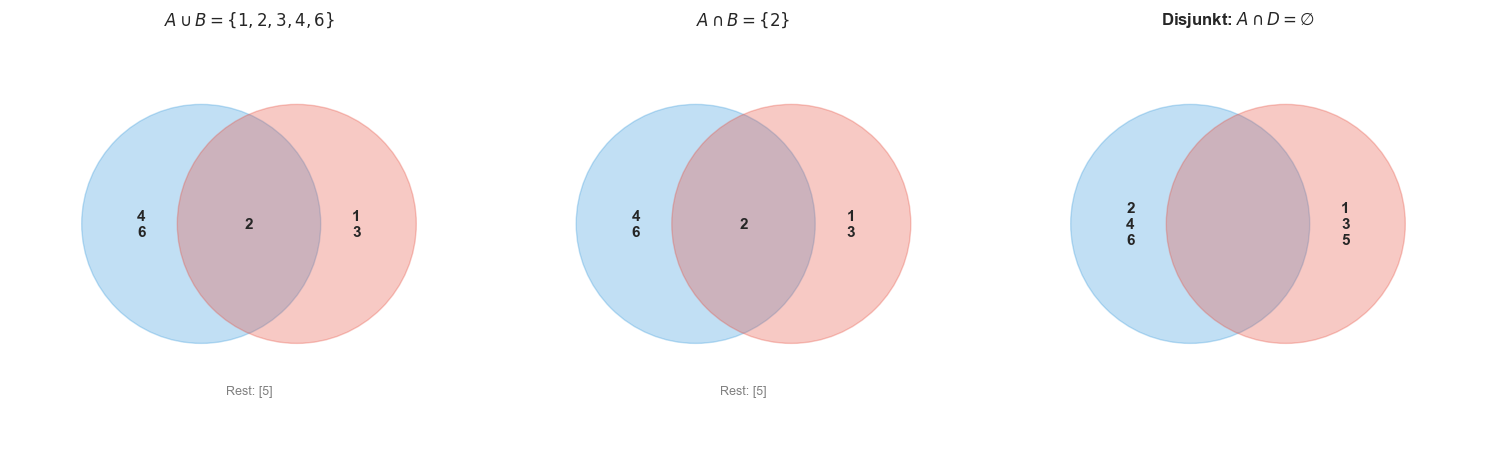

In [4]:
# Visualisierung: Venn-Diagramme
fig, axes = plt.subplots(1, 3, figsize=(15, 4.5))

# Hilfsfunktion für einfache Venn-Diagramme ohne matplotlib-venn
def draw_venn(ax, A, B, omega, title, labelA='A', labelB='B'):
    # Zeichne ein einfaches Venn-Diagramm mit Kreisen
    circle_A = plt.Circle((-0.2, 0), 0.5, fill=True, alpha=0.3, color='#3498db', label=labelA)
    circle_B = plt.Circle((0.2, 0), 0.5, fill=True, alpha=0.3, color='#e74c3c', label=labelB)
    ax.add_patch(circle_A)
    ax.add_patch(circle_B)
    
    only_A = sorted(A - B)
    both = sorted(A & B)
    only_B = sorted(B - A)
    neither = sorted(omega - A - B)
    
    ax.text(-0.45, 0, '\n'.join(str(x) for x in only_A), ha='center', va='center', fontsize=11, fontweight='bold')
    ax.text(0, 0, '\n'.join(str(x) for x in both), ha='center', va='center', fontsize=11, fontweight='bold')
    ax.text(0.45, 0, '\n'.join(str(x) for x in only_B), ha='center', va='center', fontsize=11, fontweight='bold')
    if neither:
        ax.text(0, -0.7, f'Rest: {neither}', ha='center', va='center', fontsize=9, color='gray')
    
    ax.set_xlim(-1, 1)
    ax.set_ylim(-0.9, 0.8)
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_aspect('equal')
    ax.axis('off')

omega = {1, 2, 3, 4, 5, 6}
A = {2, 4, 6}  # Gerade
B = {1, 2, 3}  # ≤ 3

draw_venn(axes[0], A, B, omega, '$A \\cup B = \\{1,2,3,4,6\\}$', 'A (gerade)', 'B (≤3)')
draw_venn(axes[1], A, B, omega, '$A \\cap B = \\{2\\}$', 'A (gerade)', 'B (≤3)')

# Disjunkte Ereignisse
A_gerade = {2, 4, 6}
D_ungerade = {1, 3, 5}
draw_venn(axes[2], A_gerade, D_ungerade, omega, 'Disjunkt: $A \\cap D = \\emptyset$', 'A (gerade)', 'D (ungerade)')

plt.tight_layout()
plt.show()


---
## 2. Wahrscheinlichkeiten

### 2.1 Kolmogorov-Axiome

$$\text{(K1)} \quad 0 \leq P(A) \leq 1 \quad \text{für alle } A$$

$$\text{(K2)} \quad P(\Omega) = 1$$

$$\text{(K3)} \quad P\left(\bigcup_{i=1}^{\infty} A_i\right) = \sum_{i=1}^{\infty} P(A_i) \quad \text{falls } A_i \cap A_j = \emptyset \text{ für } i \neq j$$

### 2.2 Laplace-Wahrscheinlichkeit

Falls alle Ergebnisse **gleichwahrscheinlich** sind:

$$P(A) = \frac{|A|}{|\Omega|} = \frac{\text{Anzahl günstiger Fälle}}{\text{Anzahl aller möglichen Fälle}}$$


In [5]:
# Laplace-Wahrscheinlichkeit beim Würfelwurf
omega = {1, 2, 3, 4, 5, 6}

A = {2, 4, 6}   # Gerade Zahl
B = {1, 2, 3}   # Höchstens 3
C = {6}          # Genau 6
D = {1, 2, 3, 4, 5, 6}  # Sicheres Ereignis

for name, ereignis in [('A (gerade)', A), ('B (≤3)', B), ('C (=6)', C), ('D (sicher)', D)]:
    P = Fraction(len(ereignis), len(omega))
    print(f"P({name:12s}) = |{sorted(ereignis)}| / |Ω| = {P} = {float(P):.4f}")

print(f"\nP(∅) = 0/{len(omega)} = 0  (unmögliches Ereignis)")


P(A (gerade)  ) = |[2, 4, 6]| / |Ω| = 1/2 = 0.5000
P(B (≤3)      ) = |[1, 2, 3]| / |Ω| = 1/2 = 0.5000
P(C (=6)      ) = |[6]| / |Ω| = 1/6 = 0.1667
P(D (sicher)  ) = |[1, 2, 3, 4, 5, 6]| / |Ω| = 1 = 1.0000

P(∅) = 0/6 = 0  (unmögliches Ereignis)


In [6]:
# Laplace: Kartenziehen
# Standarddeck: 52 Karten, 4 Farben × 13 Werte
farben = ['Herz', 'Karo', 'Pik', 'Kreuz']
werte = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Bube', 'Dame', 'König', 'Ass']
deck = [(f, w) for f in farben for w in werte]

print(f"|Ω| = {len(deck)} Karten\n")

# Ereignisse
herz = [k for k in deck if k[0] == 'Herz']
asse = [k for k in deck if k[1] == 'Ass']
bild = [k for k in deck if k[1] in ['Bube', 'Dame', 'König']]

for name, ereignis in [('Herz-Karte', herz), ('ein Ass', asse), ('eine Bildkarte', bild)]:
    P = Fraction(len(ereignis), len(deck))
    print(f"P({name:15s}) = {len(ereignis)}/{len(deck)} = {P} = {float(P):.4f}")


|Ω| = 52 Karten

P(Herz-Karte     ) = 13/52 = 1/4 = 0.2500
P(ein Ass        ) = 4/52 = 1/13 = 0.0769
P(eine Bildkarte ) = 12/52 = 3/13 = 0.2308


### 2.3 Grundlegende Rechenregeln

**Unmögliches Ereignis:** $\;P(\emptyset) = 0$

**Gegenereignis:** $\;P(\bar{A}) = 1 - P(A)$

**Additionssatz:**

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

**Spezialfall (disjunkt):** Falls $A \cap B = \emptyset$:

$$P(A \cup B) = P(A) + P(B)$$


In [7]:
# Additionssatz: Würfelwurf
omega = {1, 2, 3, 4, 5, 6}
A = {2, 4, 6}  # Gerade
B = {1, 2, 3}  # Höchstens 3

P_A = len(A) / len(omega)
P_B = len(B) / len(omega)
P_AB = len(A & B) / len(omega)
P_AuB = P_A + P_B - P_AB

print("Additionssatz: P(A ∪ B) = P(A) + P(B) - P(A ∩ B)")
print(f"\nA = {sorted(A)} (gerade),  B = {sorted(B)} (≤3)")
print(f"A ∩ B = {sorted(A & B)}")
print(f"\nP(A)     = {Fraction(len(A), len(omega))} = {P_A:.4f}")
print(f"P(B)     = {Fraction(len(B), len(omega))} = {P_B:.4f}")
print(f"P(A ∩ B) = {Fraction(len(A & B), len(omega))} = {P_AB:.4f}")
print(f"\nP(A ∪ B) = {P_A:.4f} + {P_B:.4f} - {P_AB:.4f} = {P_AuB:.4f}")
print(f"         = {Fraction(len(A | B), len(omega))}")
print(f"\nKontrolle: A ∪ B = {sorted(A | B)}, |A ∪ B|/|Ω| = {len(A | B)}/{len(omega)} ✓")


Additionssatz: P(A ∪ B) = P(A) + P(B) - P(A ∩ B)

A = [2, 4, 6] (gerade),  B = [1, 2, 3] (≤3)
A ∩ B = [2]

P(A)     = 1/2 = 0.5000
P(B)     = 1/2 = 0.5000
P(A ∩ B) = 1/6 = 0.1667

P(A ∪ B) = 0.5000 + 0.5000 - 0.1667 = 0.8333
         = 5/6

Kontrolle: A ∪ B = [1, 2, 3, 4, 6], |A ∪ B|/|Ω| = 5/6 ✓


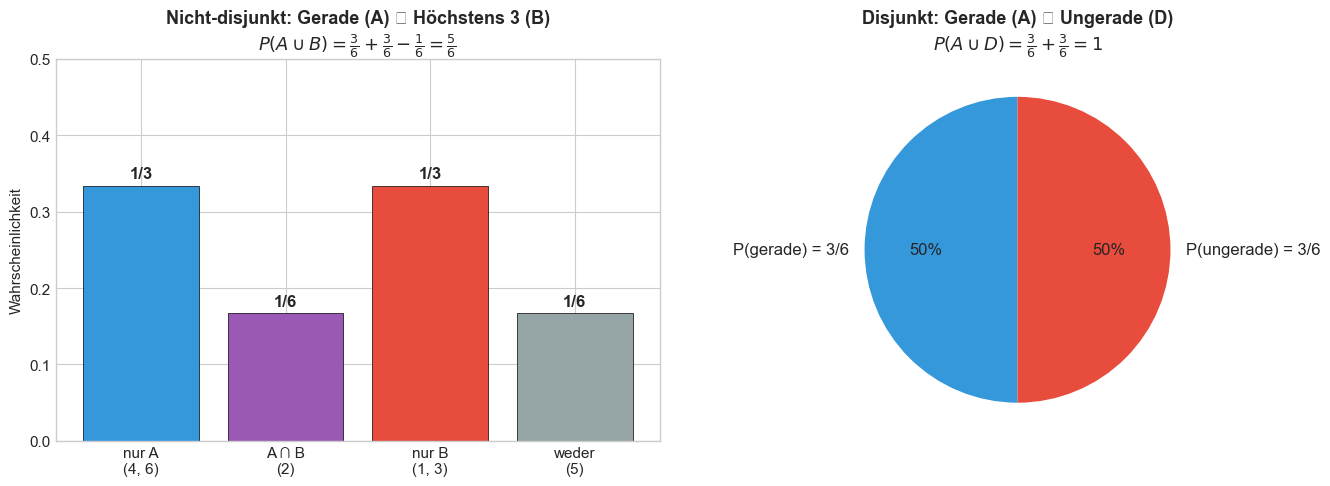

In [8]:
# Visualisierung: Additionssatz
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Fall 1: Nicht-disjunkt (Würfel: gerade ∪ ≤3)
ax = axes[0]
kategorien = ['nur A\n(4, 6)', 'A ∩ B\n(2)', 'nur B\n(1, 3)', 'weder\n(5)']
werte = [2/6, 1/6, 2/6, 1/6]
farben = ['#3498db', '#9b59b6', '#e74c3c', '#95a5a6']
bars = ax.bar(kategorien, werte, color=farben, edgecolor='black', linewidth=0.5)
for bar, val in zip(bars, werte):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
            f'{Fraction(val).limit_denominator(6)}', ha='center', fontweight='bold', fontsize=12)
ax.set_ylabel('Wahrscheinlichkeit')
ax.set_title('Nicht-disjunkt: Gerade (A) ∪ Höchstens 3 (B)\n'
             '$P(A \\cup B) = \\frac{3}{6} + \\frac{3}{6} - \\frac{1}{6} = \\frac{5}{6}$', 
             fontweight='bold')
ax.set_ylim(0, 0.5)

# Fall 2: Disjunkt (Würfel: gerade ∪ ungerade)
ax = axes[1]
labels = ['P(gerade) = 3/6', 'P(ungerade) = 3/6']
sizes = [0.5, 0.5]
colors = ['#3498db', '#e74c3c']
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%',
       startangle=90, textprops={'fontsize': 12})
ax.set_title('Disjunkt: Gerade (A) ∪ Ungerade (D)\n'
             '$P(A \\cup D) = \\frac{3}{6} + \\frac{3}{6} = 1$', fontweight='bold')

plt.tight_layout()
plt.show()


---
## 3. Bedingte Wahrscheinlichkeit

### Definition

$$P(A \mid B) = \frac{P(A \cap B)}{P(B)} \quad \text{falls } P(B) > 0$$

**Intuition:** Wenn wir wissen, dass $B$ eingetreten ist, beschränken wir uns auf den reduzierten Ergebnisraum $B$. Innerhalb von $B$ fragen wir: Wie wahrscheinlich ist $A$?


In [9]:
# Bedingte Wahrscheinlichkeit: Würfelwurf
omega = {1, 2, 3, 4, 5, 6}
A = {2, 4, 6}  # Gerade Zahl
B = {4, 5, 6}  # Größer als 3

P_A = len(A) / len(omega)
P_B = len(B) / len(omega)
P_AB = len(A & B) / len(omega)

P_A_gegeben_B = P_AB / P_B

print("Bedingte Wahrscheinlichkeit beim Würfelwurf")
print(f"A = {sorted(A)} (gerade),  B = {sorted(B)} (>3)")
print(f"A ∩ B = {sorted(A & B)}")
print(f"\nP(A|B) = P(A ∩ B) / P(B) = {Fraction(len(A & B), len(omega))} / {Fraction(len(B), len(omega))}")
print(f"       = {Fraction(len(A & B), len(B))} = {P_A_gegeben_B:.4f}")
print(f"\nInterpretation:")
print(f"  Ohne Bedingung: P(gerade) = {P_A:.4f}")
print(f"  Gegeben >3:     P(gerade | >3) = {P_A_gegeben_B:.4f}")
print(f"  → Wenn wir wissen, dass die Zahl >3 ist (also 4, 5 oder 6),")
print(f"    sind 2 von 3 Werten gerade (4 und 6).")


Bedingte Wahrscheinlichkeit beim Würfelwurf
A = [2, 4, 6] (gerade),  B = [4, 5, 6] (>3)
A ∩ B = [4, 6]

P(A|B) = P(A ∩ B) / P(B) = 1/3 / 1/2
       = 2/3 = 0.6667

Interpretation:
  Ohne Bedingung: P(gerade) = 0.5000
  Gegeben >3:     P(gerade | >3) = 0.6667
  → Wenn wir wissen, dass die Zahl >3 ist (also 4, 5 oder 6),
    sind 2 von 3 Werten gerade (4 und 6).


In [10]:
# Bedingte Wahrscheinlichkeit: Medizinischer Test
# Krankheit: 2% der Bevölkerung betroffen
# Test: 95% Sensitivität, 3% False-Positive-Rate

P_krank = 0.02
P_pos_krank = 0.95     # Sensitivität
P_pos_gesund = 0.03    # False-Positive-Rate

# P(positiv) mit totaler Wahrscheinlichkeit
P_pos = P_pos_krank * P_krank + P_pos_gesund * (1 - P_krank)

# P(krank | positiv) mit Bayes
P_krank_pos = (P_pos_krank * P_krank) / P_pos

print("Medizinischer Test – Bedingte Wahrscheinlichkeit")
print(f"P(krank)           = {P_krank:.2%}")
print(f"P(positiv | krank) = {P_pos_krank:.2%}  (Sensitivität)")
print(f"P(positiv | gesund)= {P_pos_gesund:.2%}  (False-Positive-Rate)")
print(f"\nP(positiv) = {P_pos_krank}×{P_krank} + {P_pos_gesund}×{1-P_krank}")
print(f"           = {P_pos:.4f} = {P_pos:.2%}")
print(f"\nP(krank | positiv) = {P_pos_krank}×{P_krank} / {P_pos:.4f}")
print(f"                   = {P_krank_pos:.4f} = {P_krank_pos:.1%}")
print(f"\n→ Trotz positivem Test: Nur {P_krank_pos:.1%} Chance, wirklich krank zu sein!")


Medizinischer Test – Bedingte Wahrscheinlichkeit
P(krank)           = 2.00%
P(positiv | krank) = 95.00%  (Sensitivität)
P(positiv | gesund)= 3.00%  (False-Positive-Rate)

P(positiv) = 0.95×0.02 + 0.03×0.98
           = 0.0484 = 4.84%

P(krank | positiv) = 0.95×0.02 / 0.0484
                   = 0.3926 = 39.3%

→ Trotz positivem Test: Nur 39.3% Chance, wirklich krank zu sein!


### 3.1 Unabhängige Ereignisse

Zwei Ereignisse $A$ und $B$ heißen **unabhängig**, falls:

$$P(A \cap B) = P(A) \cdot P(B)$$

Äquivalent: $P(A \mid B) = P(A)$ – die Bedingung $B$ ändert nichts an der Wahrscheinlichkeit von $A$.


In [11]:
# Unabhängigkeit: Zwei Würfel
# Erster Würfel: A = "gerade Zahl"
# Zweiter Würfel: B = "Zahl ≥ 4"

P_A = 3/6  # P(gerade)
P_B = 3/6  # P(≥4)

# Bei zwei unabhängigen Würfeln:
P_AB = P_A * P_B

print("Zwei unabhängige Würfelwürfe")
print(f"A: Erster Würfel zeigt gerade Zahl  → P(A) = {Fraction(P_A).limit_denominator()}")
print(f"B: Zweiter Würfel zeigt ≥ 4        → P(B) = {Fraction(P_B).limit_denominator()}")
print(f"\nBei Unabhängigkeit:")
print(f"P(A ∩ B) = P(A) · P(B) = {Fraction(P_A).limit_denominator()} × {Fraction(P_B).limit_denominator()} = {Fraction(P_AB).limit_denominator()}")
print(f"         = {P_AB:.4f}")

print("\n" + "="*55)
print("\nGegenbeispiel: Ziehen OHNE Zurücklegen")
print("Urne mit 3 roten und 7 blauen Kugeln (n=10)")
P_rot_1 = Fraction(3, 10)
P_rot_2_gegeben_rot_1 = Fraction(2, 9)
P_rot_2_gegeben_blau_1 = Fraction(3, 9)
print(f"P(1. Kugel rot) = {P_rot_1}")
print(f"P(2. Kugel rot | 1. war rot)  = {P_rot_2_gegeben_rot_1}")
print(f"P(2. Kugel rot | 1. war blau) = {P_rot_2_gegeben_blau_1}")
print(f"\n→ NICHT unabhängig! Die erste Ziehung beeinflusst die zweite.")


Zwei unabhängige Würfelwürfe
A: Erster Würfel zeigt gerade Zahl  → P(A) = 1/2
B: Zweiter Würfel zeigt ≥ 4        → P(B) = 1/2

Bei Unabhängigkeit:
P(A ∩ B) = P(A) · P(B) = 1/2 × 1/2 = 1/4
         = 0.2500


Gegenbeispiel: Ziehen OHNE Zurücklegen
Urne mit 3 roten und 7 blauen Kugeln (n=10)
P(1. Kugel rot) = 3/10
P(2. Kugel rot | 1. war rot)  = 2/9
P(2. Kugel rot | 1. war blau) = 1/3

→ NICHT unabhängig! Die erste Ziehung beeinflusst die zweite.


---
## 4. Satz von der totalen Wahrscheinlichkeit

Wenn $B_1, B_2, \ldots, B_n$ eine **Zerlegung** (Partition) von $\Omega$ bilden:

$$P(A) = \sum_{i=1}^{n} P(A \mid B_i) \cdot P(B_i)$$


In [12]:
# Totale Wahrscheinlichkeit: Urnen-Beispiel
# Drei Urnen mit unterschiedlicher Zusammensetzung
# Urne 1: 3 rote, 7 blaue (10 Kugeln)
# Urne 2: 6 rote, 4 blaue (10 Kugeln)
# Urne 3: 8 rote, 2 blaue (10 Kugeln)
# Eine Urne wird zufällig mit P(B1)=0.5, P(B2)=0.3, P(B3)=0.2 gewählt

urnen = {
    'Urne 1': {'P_Bi': 0.50, 'P_rot': 3/10},
    'Urne 2': {'P_Bi': 0.30, 'P_rot': 6/10},
    'Urne 3': {'P_Bi': 0.20, 'P_rot': 8/10},
}

print("Satz von der totalen Wahrscheinlichkeit")
print("A = 'Gezogene Kugel ist rot'\n")
print(f"{'Urne':<10} {'P(Bi)':<10} {'P(rot|Bi)':<12} {'Beitrag':<12}")
print("-" * 44)

P_rot_total = 0
beitraege = []
for name, vals in urnen.items():
    beitrag = vals['P_Bi'] * vals['P_rot']
    P_rot_total += beitrag
    beitraege.append(beitrag)
    print(f"{name:<10} {vals['P_Bi']:<10.2f} {vals['P_rot']:<12.2f} {beitrag:<12.4f}")

print("-" * 44)
print(f"{'P(rot) =':<32} {P_rot_total:<12.4f}")
print(f"\n→ Die Gesamtwahrscheinlichkeit für eine rote Kugel beträgt {P_rot_total:.1%}")


Satz von der totalen Wahrscheinlichkeit
A = 'Gezogene Kugel ist rot'

Urne       P(Bi)      P(rot|Bi)    Beitrag     
--------------------------------------------
Urne 1     0.50       0.30         0.1500      
Urne 2     0.30       0.60         0.1800      
Urne 3     0.20       0.80         0.1600      
--------------------------------------------
P(rot) =                         0.4900      

→ Die Gesamtwahrscheinlichkeit für eine rote Kugel beträgt 49.0%


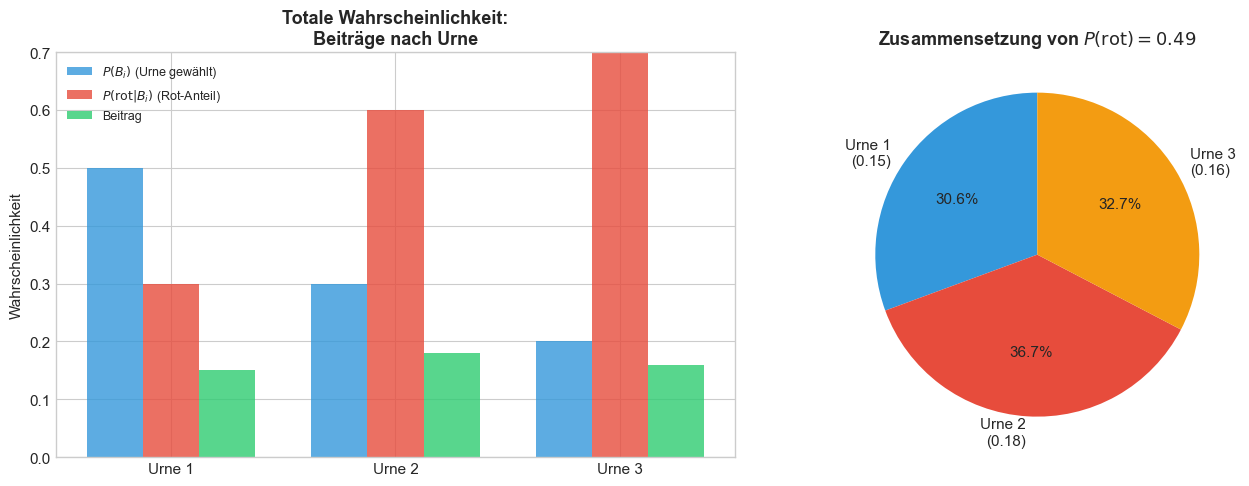

In [13]:
# Visualisierung: Beiträge der Urnen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

namen = list(urnen.keys())
p_bi = [v['P_Bi'] for v in urnen.values()]
p_rot_bi = [v['P_rot'] for v in urnen.values()]
beitraege = [v['P_Bi'] * v['P_rot'] for v in urnen.values()]

x = np.arange(len(namen))
width = 0.25

bars1 = ax1.bar(x - width, p_bi, width, label='$P(B_i)$ (Urne gewählt)', color='#3498db', alpha=0.8)
bars2 = ax1.bar(x, p_rot_bi, width, label='$P(\\text{rot} | B_i)$ (Rot-Anteil)', color='#e74c3c', alpha=0.8)
bars3 = ax1.bar(x + width, beitraege, width, label='Beitrag', color='#2ecc71', alpha=0.8)

ax1.set_ylabel('Wahrscheinlichkeit')
ax1.set_title('Totale Wahrscheinlichkeit:\nBeiträge nach Urne', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(namen)
ax1.legend(fontsize=9)
ax1.set_ylim(0, 0.7)

# Zusammensetzung als Tortendiagramm
colors = ['#3498db', '#e74c3c', '#f39c12']
labels = [f'{n}\n({b:.2f})' for n, b in zip(namen, beitraege)]
ax2.pie(beitraege, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 11})
ax2.set_title(f'Zusammensetzung von $P(\\text{{rot}}) = {sum(beitraege):.2f}$', fontweight='bold')

plt.tight_layout()
plt.show()


---
## 5. Satz von Bayes

### Formel

$$P(B \mid A) = \frac{P(A \mid B) \cdot P(B)}{P(A)}$$

Kombiniert mit totaler Wahrscheinlichkeit:

$$P(B_i \mid A) = \frac{P(A \mid B_i) \cdot P(B_i)}{\sum_{j=1}^{n} P(A \mid B_j) \cdot P(B_j)}$$

**Kernidee:** Bayes „kehrt" bedingte Wahrscheinlichkeiten um – von der Beobachtung zurück zur Ursache.


In [14]:
# Satz von Bayes: Aus welcher Urne stammt die rote Kugel?
# Fortführung des Urnen-Beispiels
# Gegeben: Die gezogene Kugel ist ROT
# Gefragt: Aus welcher Urne wurde sie wahrscheinlich gezogen?

print("Satz von Bayes: Rote Kugel gezogen – aus welcher Urne?")
print("="*55)

P_rot = P_rot_total  # Aus vorheriger Berechnung

for name, vals in urnen.items():
    P_Bi_rot = (vals['P_rot'] * vals['P_Bi']) / P_rot
    print(f"P({name} | rot) = {vals['P_rot']:.1f} × {vals['P_Bi']:.2f} / {P_rot:.4f} = {P_Bi_rot:.4f} = {P_Bi_rot:.1%}")

print(f"\n→ Am wahrscheinlichsten stammt die rote Kugel aus Urne 1 oder 2.")
print(f"  Obwohl Urne 3 den höchsten Rot-Anteil hat, wird sie am seltensten gewählt.")


Satz von Bayes: Rote Kugel gezogen – aus welcher Urne?
P(Urne 1 | rot) = 0.3 × 0.50 / 0.4900 = 0.3061 = 30.6%
P(Urne 2 | rot) = 0.6 × 0.30 / 0.4900 = 0.3673 = 36.7%
P(Urne 3 | rot) = 0.8 × 0.20 / 0.4900 = 0.3265 = 32.7%

→ Am wahrscheinlichsten stammt die rote Kugel aus Urne 1 oder 2.
  Obwohl Urne 3 den höchsten Rot-Anteil hat, wird sie am seltensten gewählt.


In [15]:
# Klassisches Bayes-Beispiel: Medizinischer Test
# Variante mit verschiedenen Prävalenzen

print("Satz von Bayes: Wie die Prävalenz das Ergebnis beeinflusst")
print("Test: Sensitivität = 99%, Spezifität = 95% (FPR = 5%)\n")

sensitivitaet = 0.99
fpr = 0.05
praevalenzen = [0.001, 0.01, 0.05, 0.10, 0.30, 0.50]

print(f"{'Prävalenz':<15} {'P(krank|pos)':<18} {'Interpretation'}")
print("-" * 65)

ppvs = []
for prev in praevalenzen:
    P_pos = sensitivitaet * prev + fpr * (1 - prev)
    ppv = (sensitivitaet * prev) / P_pos
    ppvs.append(ppv)
    
    if ppv < 0.1:
        interp = "Kaum aussagekräftig"
    elif ppv < 0.5:
        interp = "Vorsicht geboten"
    elif ppv < 0.8:
        interp = "Brauchbar"
    else:
        interp = "Sehr aussagekräftig"
    
    print(f"{prev:<15.1%} {ppv:<18.1%} {interp}")

print(f"\n→ Je seltener die Krankheit, desto mehr False Positives!")


Satz von Bayes: Wie die Prävalenz das Ergebnis beeinflusst
Test: Sensitivität = 99%, Spezifität = 95% (FPR = 5%)

Prävalenz       P(krank|pos)       Interpretation
-----------------------------------------------------------------
0.1%            1.9%               Kaum aussagekräftig
1.0%            16.7%              Vorsicht geboten
5.0%            51.0%              Brauchbar
10.0%           68.8%              Brauchbar
30.0%           89.5%              Sehr aussagekräftig
50.0%           95.2%              Sehr aussagekräftig

→ Je seltener die Krankheit, desto mehr False Positives!


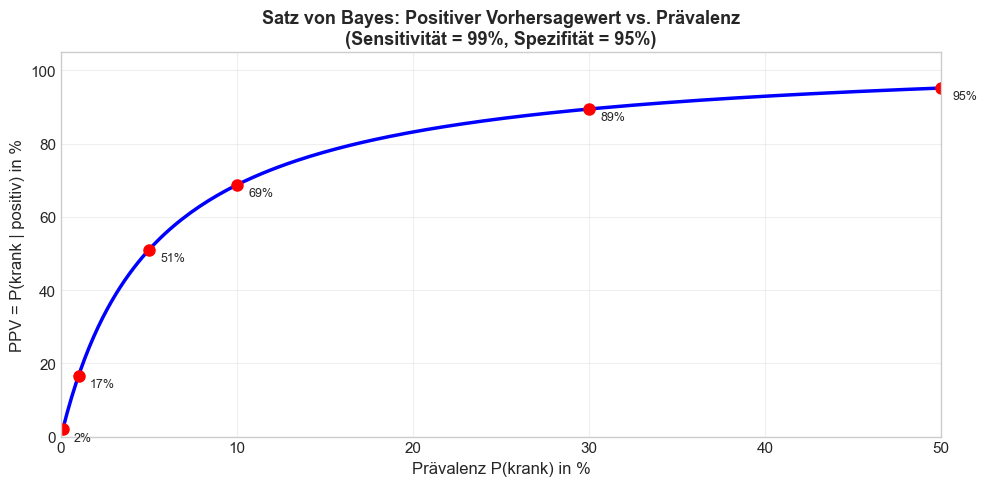

In [16]:
# Visualisierung: Einfluss der Prävalenz auf den PPV
fig, ax = plt.subplots(figsize=(10, 5))

praevalenzen_plot = np.linspace(0.001, 0.5, 200)
ppvs_plot = []
for prev in praevalenzen_plot:
    P_pos = sensitivitaet * prev + fpr * (1 - prev)
    ppv = (sensitivitaet * prev) / P_pos
    ppvs_plot.append(ppv)

ax.plot(praevalenzen_plot * 100, np.array(ppvs_plot) * 100, 'b-', linewidth=2.5)

# Markierungen für bestimmte Prävalenzen
for prev, ppv in zip(praevalenzen, ppvs):
    ax.plot(prev * 100, ppv * 100, 'ro', markersize=8)
    ax.annotate(f'{ppv:.0%}', (prev * 100, ppv * 100), 
                textcoords="offset points", xytext=(8, -8), fontsize=9)

ax.set_xlabel('Prävalenz P(krank) in %', fontsize=12)
ax.set_ylabel('PPV = P(krank | positiv) in %', fontsize=12)
ax.set_title('Satz von Bayes: Positiver Vorhersagewert vs. Prävalenz\n'
             '(Sensitivität = 99%, Spezifität = 95%)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 50)
ax.set_ylim(0, 105)

plt.tight_layout()
plt.show()


---
## 6. Diskrete Zufallsvariablen

### 6.1 Definition

Eine **Zufallsvariable** $X: \Omega \to \mathbb{R}$ bildet Ergebnisse auf Zahlen ab.

### Wahrscheinlichkeitsfunktion (PMF)

$$p(x) = P(X = x)$$

**Eigenschaften:**
1. $p(x) \geq 0$ für alle $x$
2. $\sum_{\text{alle } x} p(x) = 1$

### Verteilungsfunktion (CDF)

$$F(x) = P(X \leq x) = \sum_{k \leq x} p(k)$$


In [17]:
# Diskrete Zufallsvariable: Summe zweier Würfel
# X = Augensumme bei zwei Würfeln

from collections import Counter

# Alle möglichen Ergebnisse
ergebnisse = [(i, j) for i in range(1, 7) for j in range(1, 7)]
summen = [i + j for i, j in ergebnisse]
zaehler = Counter(summen)

x_vals = np.arange(2, 13)
pmf = np.array([zaehler[x] / 36 for x in x_vals])
cdf = np.cumsum(pmf)

# Tabelle
df = pd.DataFrame({
    'x': x_vals,
    'Anzahl': [zaehler[x] for x in x_vals],
    'p(x) = P(X=x)': [f'{zaehler[x]}/36 = {zaehler[x]/36:.4f}' for x in x_vals],
    'F(x) = P(X≤x)': [f'{c:.4f}' for c in cdf]
})
print("X = Augensumme bei zwei fairen Würfeln")
print(f"|Ω| = 6 × 6 = {len(ergebnisse)} gleichwahrscheinliche Ergebnisse\n")
print(df.to_string(index=False))

print(f"\nKontrolle: Σp(x) = {pmf.sum():.4f} ✓")
print(f"\nBeispiele:")
print(f"P(X = 7) = {zaehler[7]}/36 = {zaehler[7]/36:.4f}  (häufigste Summe)")
print(f"P(X ≤ 4) = F(4) = {cdf[2]:.4f}")
print(f"P(X > 9) = 1 - F(9) = {1-cdf[7]:.4f}")


X = Augensumme bei zwei fairen Würfeln
|Ω| = 6 × 6 = 36 gleichwahrscheinliche Ergebnisse

 x  Anzahl p(x) = P(X=x) F(x) = P(X≤x)
 2       1 1/36 = 0.0278        0.0278
 3       2 2/36 = 0.0556        0.0833
 4       3 3/36 = 0.0833        0.1667
 5       4 4/36 = 0.1111        0.2778
 6       5 5/36 = 0.1389        0.4167
 7       6 6/36 = 0.1667        0.5833
 8       5 5/36 = 0.1389        0.7222
 9       4 4/36 = 0.1111        0.8333
10       3 3/36 = 0.0833        0.9167
11       2 2/36 = 0.0556        0.9722
12       1 1/36 = 0.0278        1.0000

Kontrolle: Σp(x) = 1.0000 ✓

Beispiele:
P(X = 7) = 6/36 = 0.1667  (häufigste Summe)
P(X ≤ 4) = F(4) = 0.1667
P(X > 9) = 1 - F(9) = 0.1667


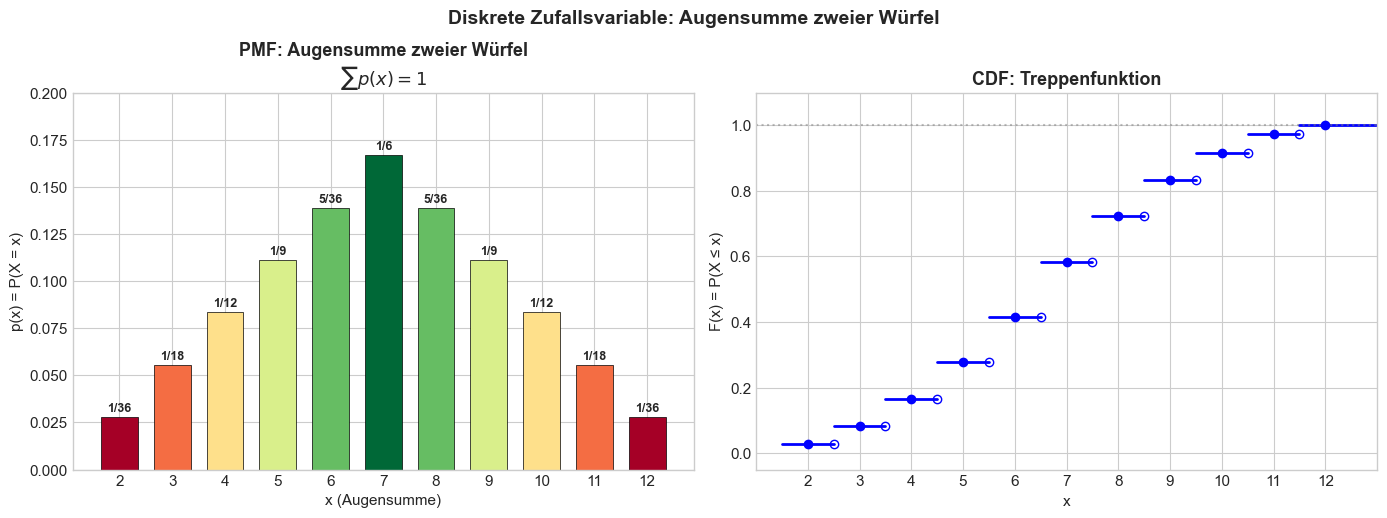

In [18]:
# Visualisierung: PMF und CDF der Augensumme
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# PMF
colors = plt.cm.RdYlGn_r(np.abs(x_vals - 7) / 5)
bars = ax1.bar(x_vals, pmf, color=colors, edgecolor='black', linewidth=0.5, width=0.7)
for xi, pi in zip(x_vals, pmf):
    frac = Fraction(int(pi * 36), 36)
    ax1.text(xi, pi + 0.003, f'{frac}', ha='center', fontsize=9, fontweight='bold')
ax1.set_xlabel('x (Augensumme)')
ax1.set_ylabel('p(x) = P(X = x)')
ax1.set_title('PMF: Augensumme zweier Würfel\n$\\sum p(x) = 1$', fontweight='bold')
ax1.set_xticks(x_vals)
ax1.set_ylim(0, 0.2)

# CDF als Treppenfunktion
for i in range(len(x_vals)):
    x_start = x_vals[i] - 0.5
    x_end = x_vals[i] + 0.5 if i < len(x_vals) - 1 else x_vals[i] + 1
    ax2.plot([x_start, x_end], [cdf[i], cdf[i]], 'b-', linewidth=2)
    ax2.plot(x_vals[i], cdf[i], 'bo', markersize=6, zorder=5)
    if i > 0:
        ax2.plot(x_vals[i] - 0.5, cdf[i-1], 'bo', markersize=6, fillstyle='none', linewidth=1.5, zorder=5)

ax2.set_xlabel('x')
ax2.set_ylabel('F(x) = P(X ≤ x)')
ax2.set_title('CDF: Treppenfunktion', fontweight='bold')
ax2.set_ylim(-0.05, 1.1)
ax2.set_xlim(1, 13)
ax2.axhline(y=1, color='gray', linestyle=':', alpha=0.5)
ax2.set_xticks(x_vals)

plt.tight_layout()
plt.suptitle('Diskrete Zufallsvariable: Augensumme zweier Würfel', 
             fontsize=14, fontweight='bold', y=1.03)
plt.show()


---
## 7. Stetige Zufallsvariablen

### 7.1 Fundamentaler Unterschied

| Aspekt | Diskret | Stetig |
|--------|---------|--------|
| Mögliche Werte | Abzählbar (0, 1, 2, …) | Überabzählbar (Kontinuum) |
| $P(X = x)$ | Kann positiv sein | **Immer 0!** |
| Beschreibung | PMF: $p(x)$ | **Dichtefunktion**: $f(x)$ |
| Normalisierung | $\sum p(x) = 1$ | $\int f(x)\,dx = 1$ |

### Dichtefunktion (PDF)

$$P(a \leq X \leq b) = \int_a^b f(x)\,dx$$

> **Wichtig:** $f(x)$ ist **keine** Wahrscheinlichkeit, sondern eine **Dichte**!  
> Nur Flächen unter $f(x)$ ergeben Wahrscheinlichkeiten.

### Verteilungsfunktion (CDF)

$$F(x) = P(X \leq x) = \int_{-\infty}^{x} f(t)\,dt \qquad \text{und} \qquad f(x) = F'(x)$$


In [19]:
# Stetige Zufallsvariable: Gleichverteilung auf [0, 60] Minuten
# "Wartezeit auf den nächsten Bus, der alle 60 Minuten fährt"
a, b = 0, 60
f_x = 1 / (b - a)

print(f"Gleichverteilung auf [{a}, {b}] Minuten (Wartezeit auf Bus)")
print(f"Dichtefunktion: f(x) = 1/{b-a} = {f_x:.4f}")

# Wahrscheinlichkeiten
print(f"\nIntervallwahrscheinlichkeiten:")
intervalle = [(0, 10), (10, 30), (20, 40), (45, 60)]
for lo, hi in intervalle:
    P = f_x * (hi - lo)
    print(f"P({lo} ≤ X ≤ {hi}) = {f_x:.4f} × {hi-lo} = {P:.4f} = {P:.1%}")

print(f"\nP(X = 15.0) = 0  ← Einzelwert hat Wahrscheinlichkeit 0!")

# CDF
print(f"\nVerteilungsfunktion:")
print(f"F(x) = (x - {a}) / ({b} - {a}) = x/{b}  für {a} ≤ x ≤ {b}")
for x_val in [0, 10, 15, 30, 45, 60]:
    F_val = (x_val - a) / (b - a)
    print(f"  F({x_val:2d}) = {F_val:.4f}")


Gleichverteilung auf [0, 60] Minuten (Wartezeit auf Bus)
Dichtefunktion: f(x) = 1/60 = 0.0167

Intervallwahrscheinlichkeiten:
P(0 ≤ X ≤ 10) = 0.0167 × 10 = 0.1667 = 16.7%
P(10 ≤ X ≤ 30) = 0.0167 × 20 = 0.3333 = 33.3%
P(20 ≤ X ≤ 40) = 0.0167 × 20 = 0.3333 = 33.3%
P(45 ≤ X ≤ 60) = 0.0167 × 15 = 0.2500 = 25.0%

P(X = 15.0) = 0  ← Einzelwert hat Wahrscheinlichkeit 0!

Verteilungsfunktion:
F(x) = (x - 0) / (60 - 0) = x/60  für 0 ≤ x ≤ 60
  F( 0) = 0.0000
  F(10) = 0.1667
  F(15) = 0.2500
  F(30) = 0.5000
  F(45) = 0.7500
  F(60) = 1.0000


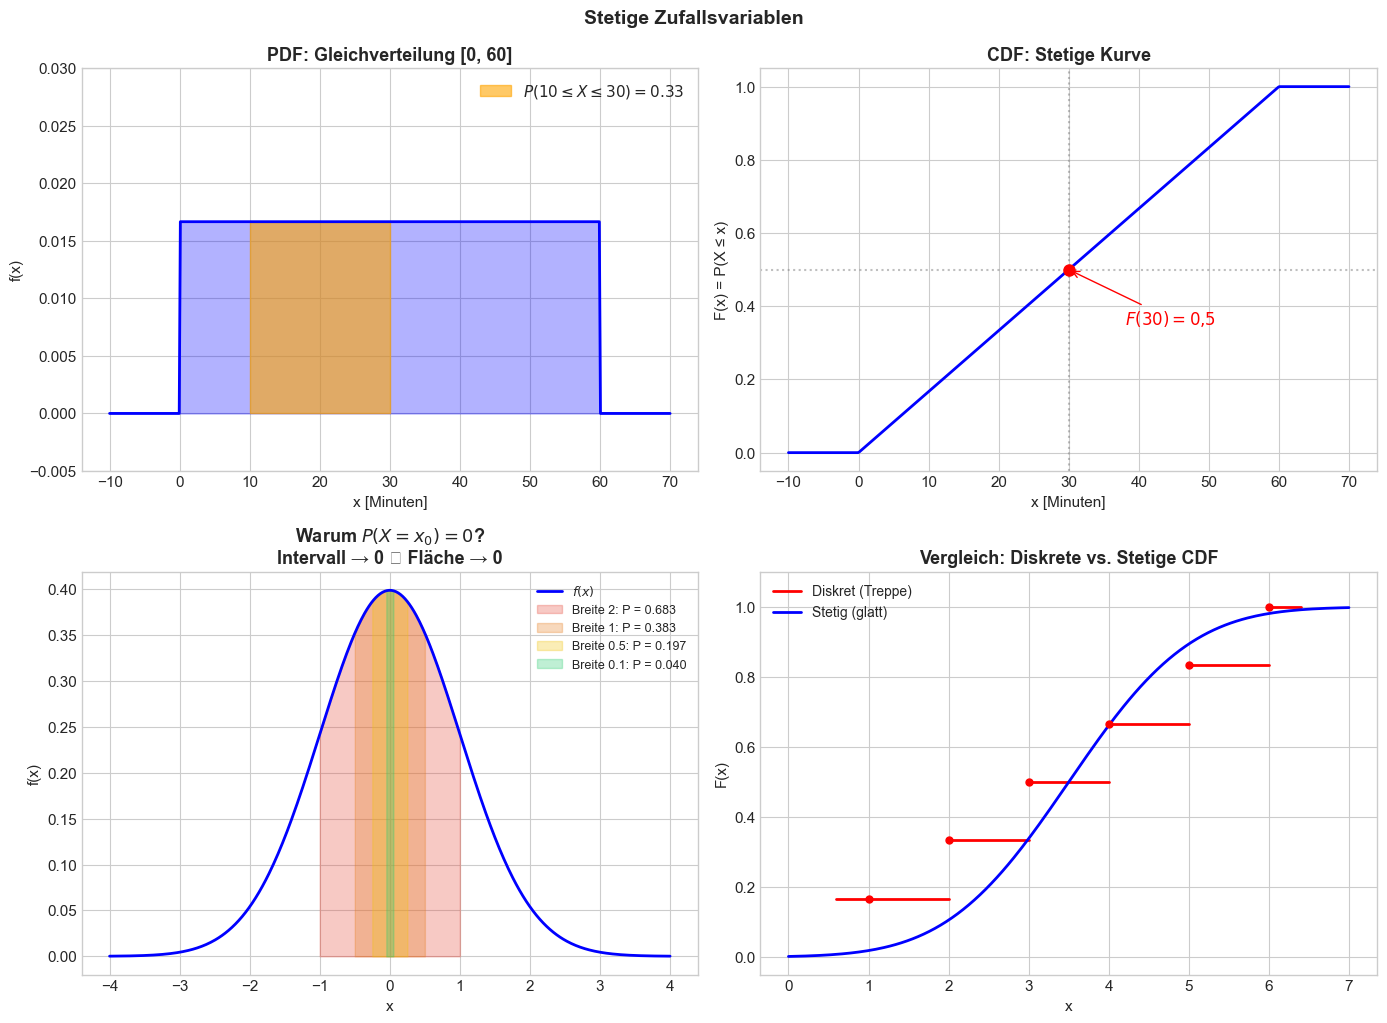

In [20]:
# Visualisierung: PDF und CDF (stetig) – Vergleich
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x = np.linspace(-10, 70, 500)

# 1. PDF der Gleichverteilung
ax = axes[0, 0]
pdf = np.where((x >= 0) & (x <= 60), 1/60, 0)
ax.fill_between(x, pdf, alpha=0.3, color='blue')
ax.plot(x, pdf, 'b-', linewidth=2)
x_fill = np.linspace(10, 30, 100)
ax.fill_between(x_fill, 1/60, alpha=0.6, color='orange', 
                label=f'$P(10 \\leq X \\leq 30) = {20/60:.2f}$')
ax.set_xlabel('x [Minuten]')
ax.set_ylabel('f(x)')
ax.set_title('PDF: Gleichverteilung [0, 60]', fontweight='bold')
ax.legend(fontsize=11)
ax.set_ylim(-0.005, 0.03)

# 2. CDF der Gleichverteilung
ax = axes[0, 1]
cdf_vals = np.where(x < 0, 0, np.where(x > 60, 1, x / 60))
ax.plot(x, cdf_vals, 'b-', linewidth=2)
ax.axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
ax.axvline(x=30, color='gray', linestyle=':', alpha=0.5)
ax.plot(30, 0.5, 'ro', markersize=8)
ax.annotate('$F(30) = 0{,}5$', (30, 0.5), xytext=(38, 0.35),
           arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, color='red')
ax.set_xlabel('x [Minuten]')
ax.set_ylabel('F(x) = P(X ≤ x)')
ax.set_title('CDF: Stetige Kurve', fontweight='bold')

# 3. Warum P(X=x)=0? – Schmaler werdendes Intervall
ax = axes[1, 0]
x_norm = np.linspace(-4, 4, 500)
pdf_norm = stats.norm.pdf(x_norm)
ax.plot(x_norm, pdf_norm, 'b-', linewidth=2, label='$f(x)$')
widths = [2, 1, 0.5, 0.1]
colors_w = ['#e74c3c', '#e67e22', '#f1c40f', '#2ecc71']
for w, c in zip(widths, colors_w):
    x_fill = np.linspace(-w/2, w/2, 100)
    y_fill = stats.norm.pdf(x_fill)
    P = stats.norm.cdf(w/2) - stats.norm.cdf(-w/2)
    ax.fill_between(x_fill, y_fill, alpha=0.3, color=c, label=f'Breite {w}: P = {P:.3f}')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Warum $P(X = x_0) = 0$?\nIntervall → 0 ⟹ Fläche → 0', fontweight='bold')
ax.legend(fontsize=9)

# 4. Vergleich: Diskrete Treppenfunktion vs. stetige CDF
ax = axes[1, 1]
# Diskrete CDF (Würfel)
x_d = [1, 2, 3, 4, 5, 6]
cdf_d = [1/6, 2/6, 3/6, 4/6, 5/6, 1.0]
for i in range(len(x_d)):
    x_start = x_d[i] - 0.4 if i == 0 else x_d[i]
    x_end = x_d[i+1] if i < len(x_d)-1 else x_d[i] + 0.4
    ax.plot([x_start, x_end], [cdf_d[i], cdf_d[i]], 'r-', linewidth=2, 
            label='Diskret (Treppe)' if i == 0 else '')
    ax.plot(x_d[i], cdf_d[i], 'ro', markersize=5, zorder=5)

# Stetige CDF (Normalverteilung zum Vergleich)
x_s = np.linspace(0, 7, 200)
cdf_s = stats.norm.cdf(x_s, loc=3.5, scale=1.2)
ax.plot(x_s, cdf_s, 'b-', linewidth=2, label='Stetig (glatt)')

ax.set_xlabel('x')
ax.set_ylabel('F(x)')
ax.set_title('Vergleich: Diskrete vs. Stetige CDF', fontweight='bold')
ax.legend(fontsize=10)
ax.set_ylim(-0.05, 1.1)

plt.tight_layout()
plt.suptitle('Stetige Zufallsvariablen', fontsize=14, fontweight='bold', y=1.02)
plt.show()


---
## 8. Zusammenfassung: Diskret vs. Stetig

| | Diskret | Stetig |
|--|---------|--------|
| **Werte** | Abzählbar (0, 1, 2, …) | Überabzählbar (Kontinuum) |
| **P(X = x)** | $p(x) > 0$ möglich | $P(X = x) = 0$ immer |
| **Funktion** | PMF: $p(x)$ | PDF: $f(x)$ |
| **Normalisierung** | $\sum p(x) = 1$ | $\int f(x)\,dx = 1$ |
| **CDF** | Treppenfunktion | Stetige Kurve |
| **P(Intervall)** | $\sum_{a \leq x \leq b} p(x)$ | $\int_a^b f(x)\,dx$ |
| **Beispiele** | Augensumme, Trefferzahl | Wartezeit, Körpergröße |


---
## 9. Übungsaufgaben


### Aufgabe 1: Mengenoperationen
Aus einer Klasse mit 30 Schülern werden zufällig Schüler ausgewählt.
- $A$: Schüler spricht Englisch (18 von 30)
- $B$: Schüler spricht Französisch (12 von 30)
- $A \cap B$: Schüler spricht beides (6 von 30)

Berechne:
1. $P(A \cup B)$ – Schüler spricht mindestens eine der beiden Sprachen
2. $P(\bar{A})$ – Schüler spricht kein Englisch
3. $P(A \setminus B)$ – Schüler spricht Englisch, aber nicht Französisch


In [21]:
# Aufgabe 1: Lösung
n = 30
P_A = 18/30
P_B = 12/30
P_AB = 6/30

P_AuB = P_A + P_B - P_AB
P_A_bar = 1 - P_A
P_AohneB = P_A - P_AB

print("Aufgabe 1: Mengenoperationen")
print(f"1. P(A ∪ B) = {Fraction(18,30)} + {Fraction(12,30)} - {Fraction(6,30)} = {Fraction(24,30)} = {P_AuB:.2f}")
print(f"2. P(Ā)     = 1 - {Fraction(18,30)} = {Fraction(12,30)} = {P_A_bar:.2f}")
print(f"3. P(A \\ B) = {Fraction(18,30)} - {Fraction(6,30)} = {Fraction(12,30)} = {P_AohneB:.2f}")


Aufgabe 1: Mengenoperationen
1. P(A ∪ B) = 3/5 + 2/5 - 1/5 = 4/5 = 0.80
2. P(Ā)     = 1 - 3/5 = 2/5 = 0.40
3. P(A \ B) = 3/5 - 1/5 = 2/5 = 0.40


### Aufgabe 2: Bedingte Wahrscheinlichkeit
In einer Fabrik werden Bauteile von drei Maschinen hergestellt:
- Maschine 1: 50% der Produktion, 3% Ausschuss
- Maschine 2: 30% der Produktion, 5% Ausschuss
- Maschine 3: 20% der Produktion, 8% Ausschuss

1. Wie hoch ist die Gesamt-Ausschussrate? (Totale Wahrscheinlichkeit)
2. Ein Bauteil ist defekt. Aus welcher Maschine stammt es wahrscheinlich? (Bayes)


In [22]:
# Aufgabe 2: Lösung
maschinen = {
    'Maschine 1': {'anteil': 0.50, 'ausschuss': 0.03},
    'Maschine 2': {'anteil': 0.30, 'ausschuss': 0.05},
    'Maschine 3': {'anteil': 0.20, 'ausschuss': 0.08},
}

# 1. Totale Wahrscheinlichkeit
P_defekt = sum(m['anteil'] * m['ausschuss'] for m in maschinen.values())
print("Aufgabe 2: Fabrik-Beispiel")
print(f"\n1. P(defekt) = ", end="")
terms = [f"{m['anteil']}×{m['ausschuss']}" for m in maschinen.values()]
print(" + ".join(terms))
print(f"             = {P_defekt:.4f} = {P_defekt:.2%}")

# 2. Bayes
print(f"\n2. Bayes: Welche Maschine bei defektem Bauteil?")
for name, m in maschinen.items():
    P_Mi_defekt = (m['ausschuss'] * m['anteil']) / P_defekt
    print(f"   P({name} | defekt) = {m['ausschuss']}×{m['anteil']} / {P_defekt:.4f} = {P_Mi_defekt:.4f} = {P_Mi_defekt:.1%}")


Aufgabe 2: Fabrik-Beispiel

1. P(defekt) = 0.5×0.03 + 0.3×0.05 + 0.2×0.08
             = 0.0460 = 4.60%

2. Bayes: Welche Maschine bei defektem Bauteil?
   P(Maschine 1 | defekt) = 0.03×0.5 / 0.0460 = 0.3261 = 32.6%
   P(Maschine 2 | defekt) = 0.05×0.3 / 0.0460 = 0.3261 = 32.6%
   P(Maschine 3 | defekt) = 0.08×0.2 / 0.0460 = 0.3478 = 34.8%


### Aufgabe 3: Unabhängigkeit
Ein fairer Würfel wird zweimal geworfen.
- $A$: Erster Wurf zeigt eine 6
- $B$: Summe beider Würfe ist $\geq 9$

1. Berechne $P(A)$, $P(B)$ und $P(A \cap B)$
2. Sind $A$ und $B$ unabhängig?


In [23]:
# Aufgabe 3: Lösung
omega = [(i, j) for i in range(1, 7) for j in range(1, 7)]
A = [(i, j) for i, j in omega if i == 6]
B = [(i, j) for i, j in omega if i + j >= 9]
AB = [(i, j) for i, j in omega if i == 6 and i + j >= 9]

P_A = len(A) / len(omega)
P_B = len(B) / len(omega)
P_AB = len(AB) / len(omega)
P_A_mal_P_B = P_A * P_B

print("Aufgabe 3: Unabhängigkeit prüfen")
print(f"A (1. Wurf = 6): {A}")
print(f"B (Summe ≥ 9):   {B}")
print(f"A ∩ B:           {AB}")
print(f"\nP(A) = {len(A)}/36 = {Fraction(len(A), 36)}")
print(f"P(B) = {len(B)}/36 = {Fraction(len(B), 36)}")
print(f"P(A ∩ B) = {len(AB)}/36 = {Fraction(len(AB), 36)}")
print(f"P(A)·P(B) = {Fraction(len(A), 36)} × {Fraction(len(B), 36)} = {Fraction(len(A)*len(B), 36*36)}")
print(f"\nP(A ∩ B) = {P_AB:.4f}")
print(f"P(A)·P(B) = {P_A_mal_P_B:.4f}")
unabh = abs(P_AB - P_A_mal_P_B) < 1e-10
print(f"\nUnabhängig? P(A∩B) = P(A)·P(B)? → {'Ja ✓' if unabh else 'Nein ✗'}")
if not unabh:
    print(f"  Differenz: {P_AB - P_A_mal_P_B:.4f}")
    print(f"  → A und B sind NICHT unabhängig, da eine 6 im ersten Wurf")
    print(f"    die Chance auf Summe ≥ 9 erhöht.")


Aufgabe 3: Unabhängigkeit prüfen
A (1. Wurf = 6): [(6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]
B (Summe ≥ 9):   [(3, 6), (4, 5), (4, 6), (5, 4), (5, 5), (5, 6), (6, 3), (6, 4), (6, 5), (6, 6)]
A ∩ B:           [(6, 3), (6, 4), (6, 5), (6, 6)]

P(A) = 6/36 = 1/6
P(B) = 10/36 = 5/18
P(A ∩ B) = 4/36 = 1/9
P(A)·P(B) = 1/6 × 5/18 = 5/108

P(A ∩ B) = 0.1111
P(A)·P(B) = 0.0463

Unabhängig? P(A∩B) = P(A)·P(B)? → Nein ✗
  Differenz: 0.0648
  → A und B sind NICHT unabhängig, da eine 6 im ersten Wurf
    die Chance auf Summe ≥ 9 erhöht.


### Aufgabe 4: Diskrete Zufallsvariable
Bei einem Glücksspiel wird ein Glücksrad mit den Sektoren 0€, 1€, 2€, 5€ und 10€ gedreht.

| Gewinn $x$ | 0 | 1 | 2 | 5 | 10 |
|---|---|---|---|---|---|
| $P(X = x)$ | 0.40 | 0.25 | 0.20 | 0.10 | 0.05 |

Berechne:
1. Die vollständige CDF $F(x)$
2. $P(X \leq 2)$
3. $P(X > 1)$
4. $P(1 \leq X \leq 5)$


In [24]:
# Aufgabe 4: Lösung
x_glueck = np.array([0, 1, 2, 5, 10])
p_glueck = np.array([0.40, 0.25, 0.20, 0.10, 0.05])
cdf_glueck = np.cumsum(p_glueck)

df = pd.DataFrame({
    'x (€)': x_glueck,
    'p(x)': p_glueck,
    'F(x) = P(X≤x)': cdf_glueck
})
print("Aufgabe 4: Glücksrad")
print(df.to_string(index=False))
print(f"\nKontrolle: Σp(x) = {p_glueck.sum():.2f} ✓")

# F(x) ist auch für Zwischenwerte definiert!
print(f"\n2. P(X ≤ 2) = F(2) = {cdf_glueck[2]:.2f}")
print(f"3. P(X > 1) = 1 - F(1) = 1 - {cdf_glueck[1]:.2f} = {1 - cdf_glueck[1]:.2f}")

# P(1 ≤ X ≤ 5) = P(X=1) + P(X=2) + P(X=5)
P_1_5 = p_glueck[1] + p_glueck[2] + p_glueck[3]
print(f"4. P(1 ≤ X ≤ 5) = p(1) + p(2) + p(5) = {p_glueck[1]} + {p_glueck[2]} + {p_glueck[3]} = {P_1_5:.2f}")


Aufgabe 4: Glücksrad
 x (€)  p(x)  F(x) = P(X≤x)
     0  0.40           0.40
     1  0.25           0.65
     2  0.20           0.85
     5  0.10           0.95
    10  0.05           1.00

Kontrolle: Σp(x) = 1.00 ✓

2. P(X ≤ 2) = F(2) = 0.85
3. P(X > 1) = 1 - F(1) = 1 - 0.65 = 0.35
4. P(1 ≤ X ≤ 5) = p(1) + p(2) + p(5) = 0.25 + 0.2 + 0.1 = 0.55


### Aufgabe 5: Stetige Zufallsvariable
Die Lebensdauer $X$ (in Jahren) einer Glühbirne folgt der Dichtefunktion:

$$f(x) = \begin{cases} \frac{1}{5} & \text{für } 0 \leq x \leq 5 \\ 0 & \text{sonst} \end{cases}$$

1. Verifiziere, dass $\int_{-\infty}^{\infty} f(x)\,dx = 1$
2. Berechne $P(1 \leq X \leq 3)$
3. Berechne $P(X > 4)$
4. Bestimme die CDF $F(x)$ und berechne $F(2{,}5)$


Aufgabe 5: Lebensdauer Glühbirne, Gleichverteilung [0, 5] Jahre

1. ∫f(x)dx = 0.2 × (5 - 0) = 1.0 ✓

2. P(1 ≤ X ≤ 3) = 0.2 × (3 - 1) = 0.40

3. P(X > 4) = 0.2 × (5 - 4) = 0.20

4. F(x) = x/5 für 0 ≤ x ≤ 5
   F(2,5) = 2,5/5 = 0.50


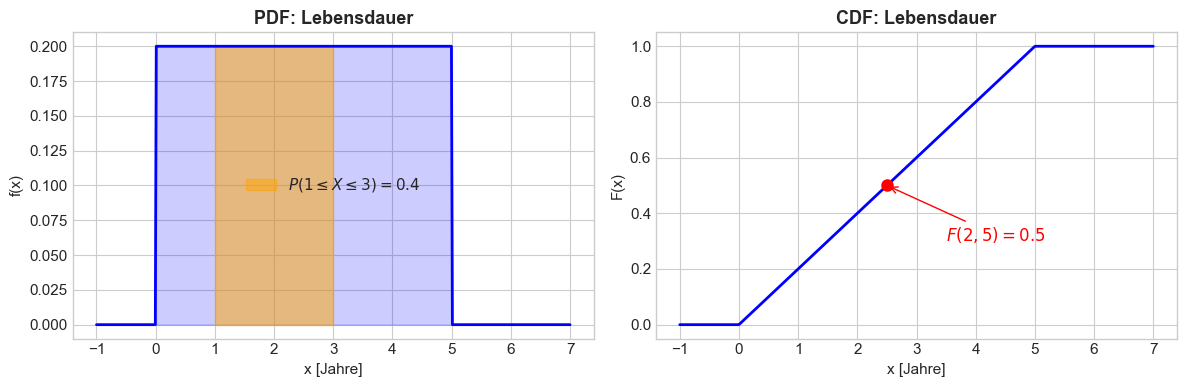

In [25]:
# Aufgabe 5: Lösung
a, b = 0, 5
f = 1 / (b - a)

print(f"Aufgabe 5: Lebensdauer Glühbirne, Gleichverteilung [{a}, {b}] Jahre")
print(f"\n1. ∫f(x)dx = {f} × ({b} - {a}) = {f * (b - a):.1f} ✓")

P_1_3 = f * (3 - 1)
print(f"\n2. P(1 ≤ X ≤ 3) = {f} × (3 - 1) = {P_1_3:.2f}")

P_gt4 = f * (b - 4)
print(f"\n3. P(X > 4) = {f} × ({b} - 4) = {P_gt4:.2f}")

F_25 = (2.5 - a) / (b - a)
print(f"\n4. F(x) = x/{b} für {a} ≤ x ≤ {b}")
print(f"   F(2,5) = 2,5/{b} = {F_25:.2f}")

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
x = np.linspace(-1, 7, 500)

pdf = np.where((x >= 0) & (x <= 5), 0.2, 0)
ax1.fill_between(x, pdf, alpha=0.2, color='blue')
ax1.plot(x, pdf, 'b-', linewidth=2)
x_fill = np.linspace(1, 3, 100)
ax1.fill_between(x_fill, 0.2, alpha=0.5, color='orange', label=f'$P(1 \\leq X \\leq 3) = {P_1_3:.1f}$')
ax1.set_xlabel('x [Jahre]')
ax1.set_ylabel('f(x)')
ax1.set_title('PDF: Lebensdauer', fontweight='bold')
ax1.legend(fontsize=11)

cdf_vals = np.where(x < 0, 0, np.where(x > 5, 1, x / 5))
ax2.plot(x, cdf_vals, 'b-', linewidth=2)
ax2.plot(2.5, F_25, 'ro', markersize=8)
ax2.annotate(f'$F(2,5) = {F_25:.1f}$', (2.5, F_25), xytext=(3.5, 0.3),
            arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, color='red')
ax2.set_xlabel('x [Jahre]')
ax2.set_ylabel('F(x)')
ax2.set_title('CDF: Lebensdauer', fontweight='bold')

plt.tight_layout()
plt.show()


---
## 10. Bonus: Monte-Carlo-Simulation

Überprüfung theoretischer Ergebnisse durch Simulation.


In [26]:
# Monte-Carlo: Würfelsumme simulieren
n_sim = 100_000

wuerfel_1 = np.random.randint(1, 7, n_sim)
wuerfel_2 = np.random.randint(1, 7, n_sim)
summen_sim = wuerfel_1 + wuerfel_2

# Vergleich Theorie vs. Simulation
print(f"Monte-Carlo: {n_sim:,} Würfelwürfe (2 Würfel)")
print(f"{'='*50}")
print(f"{'Summe':<8} {'Theorie':<12} {'Simulation':<12} {'Abweichung'}")
print(f"{'-'*50}")

for s in range(2, 13):
    theo = sum(1 for i in range(1,7) for j in range(1,7) if i+j==s) / 36
    sim = np.mean(summen_sim == s)
    print(f"{s:<8} {theo:<12.4f} {sim:<12.4f} {abs(theo-sim):<10.4f}")

print(f"\nP(Summe = 7)  Theorie: {6/36:.4f}  Simulation: {np.mean(summen_sim == 7):.4f}")
print(f"P(Summe ≥ 10) Theorie: {(3+2+1)/36:.4f}  Simulation: {np.mean(summen_sim >= 10):.4f}")


Monte-Carlo: 100,000 Würfelwürfe (2 Würfel)
Summe    Theorie      Simulation   Abweichung
--------------------------------------------------
2        0.0278       0.0280       0.0002    
3        0.0556       0.0550       0.0005    
4        0.0833       0.0833       0.0001    
5        0.1111       0.1104       0.0007    
6        0.1389       0.1392       0.0004    
7        0.1667       0.1657       0.0010    
8        0.1389       0.1417       0.0028    
9        0.1111       0.1103       0.0008    
10       0.0833       0.0830       0.0003    
11       0.0556       0.0560       0.0005    
12       0.0278       0.0273       0.0004    

P(Summe = 7)  Theorie: 0.1667  Simulation: 0.1657
P(Summe ≥ 10) Theorie: 0.1667  Simulation: 0.1663


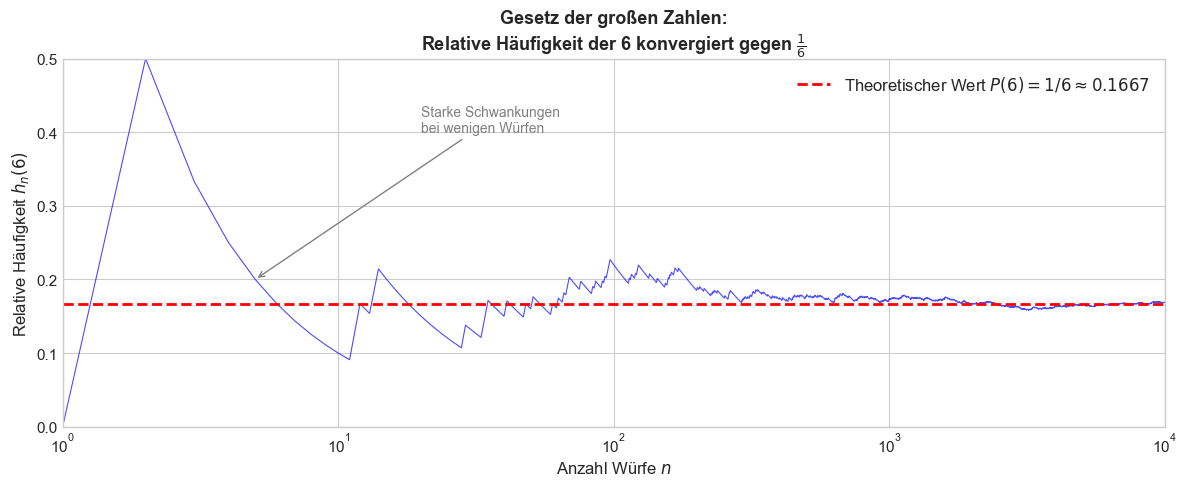

In [27]:
# Gesetz der großen Zahlen: Relative Häufigkeit konvergiert
n_max = 10_000
wuerfe = np.random.randint(1, 7, n_max)
sechsen = (wuerfe == 6)

# Kumulative relative Häufigkeit
cum_freq = np.cumsum(sechsen) / np.arange(1, n_max + 1)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(range(1, n_max + 1), cum_freq, 'b-', alpha=0.7, linewidth=0.8)
ax.axhline(y=1/6, color='red', linestyle='--', linewidth=2, 
           label=f'Theoretischer Wert $P(6) = 1/6 \\approx {1/6:.4f}$')
ax.set_xlabel('Anzahl Würfe $n$', fontsize=12)
ax.set_ylabel('Relative Häufigkeit $h_n(6)$', fontsize=12)
ax.set_title('Gesetz der großen Zahlen:\n'
             'Relative Häufigkeit der 6 konvergiert gegen $\\frac{1}{6}$', 
             fontsize=13, fontweight='bold')
ax.legend(fontsize=12)
ax.set_xscale('log')
ax.set_xlim(1, n_max)
ax.set_ylim(0, 0.5)

ax.annotate('Starke Schwankungen\nbei wenigen Würfen', xy=(5, cum_freq[4]),
            xytext=(20, 0.4), arrowprops=dict(arrowstyle='->', color='gray'),
            fontsize=10, color='gray')

plt.tight_layout()
plt.show()


---
## Zusammenfassung

**Kernkonzepte dieses Kapitels:**

1. **Ergebnisraum und Ereignisse:** Zufallsvorgänge durch $\Omega$ und Teilmengen beschreiben
2. **Kolmogorov-Axiome:** Fundamentale Regeln für Wahrscheinlichkeiten
3. **Rechenregeln:** Additionssatz, Gegenereignis, bedingte Wahrscheinlichkeit
4. **Unabhängigkeit:** $P(A \cap B) = P(A) \cdot P(B)$
5. **Totale Wahrscheinlichkeit:** Zerlegung komplexer Wahrscheinlichkeiten
6. **Satz von Bayes:** Von Beobachtung zu Ursache
7. **Diskrete ZV:** PMF $p(x) = P(X=x)$, CDF als Treppenfunktion
8. **Stetige ZV:** PDF $f(x)$, $P(X=x)=0$, CDF als glatte Kurve

> **Nächstes Kapitel:** Verteilungen – Binomial, Poisson, Normal & Co.
